In [1]:
import os

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = '1990_01-2023_06_Gippsland_Lakes_Water_quality_data.xlsx'
data = pd.read_excel(file_path)

# Calculate the percentage of missing values for each column
missing_data_percentage = data.isnull().mean() * 100

# Set a threshold for missing data to decide whether to drop the column
threshold = 50  # percentage
columns_to_drop = missing_data_percentage[missing_data_percentage > threshold].index.tolist()

# Drop columns with missing data above the threshold
data_cleaned = data.drop(columns=columns_to_drop)

# Remove any duplicate rows in the dataset
data_cleaned = data_cleaned.drop_duplicates()

# Rename columns for clarity and consistency
renamed_data = data_cleaned.rename(columns=lambda x: x.strip().replace(" ", "_").lower())

# The cleaned dataset is now stored in 'renamed_data' and is ready for further analysis


In [54]:
renamed_data.head()

,site_id,site_name_short,water_body,date,type,chl_a,do_mg,sal,temp,do_sat,tss,n_nh3,n_no2,n_no3,n_nox,n_total,p_po4,p_total,si
0,2306,Lake Wellington,Gippsland Lakes,1990-01-22,surface,NaN,NaN,3.5,22.1,NaN,NaN,4.93,0.25,0.00,0.21,574.23,1.01,32.52,1020.80
1,2306,Lake Wellington,Gippsland Lakes,1990-01-22,bottom,NaN,NaN,3.8,20.4,NaN,NaN,4.81,0.25,-0.03,0.21,580.81,4.23,34.48,1263.30
2,2311,Lake Victoria,Gippsland Lakes,1990-01-22,surface,NaN,NaN,16.8,21.5,NaN,NaN,5.97,0.14,-0.16,-0.02,526.85,10.38,41.56,62.44
3,2311,Lake Victoria,Gippsland Lakes,1990-01-22,bottom,NaN,NaN,25.2,20.4,NaN,NaN,33.02,0.32,0.25,0.57,456.93,75.95,107.53,798.39
4,2314,Lake King South,Gippsland Lakes,1990-01-22,surface,NaN,NaN,18.9,22.2,NaN,NaN,6.39,0.14,0.07,0.21,831.75,11.05,47.69,7.10


In [55]:
renamed_data.describe()

,site_id,chl_a,do_mg,sal,temp,do_sat,tss,n_nh3,n_no2,n_no3,n_nox,n_total,p_po4,p_total,si
count,3240.00000,2047.000000,2748.000000,2965.000000,2621.000000,2258.000000,2562.000000,2647.000000,2636.000000,2607.000000,2590.000000,2647.000000,2634.000000,2646.000000,2354.000000
mean,2314.87037,9.142418,8.176391,21.554111,16.463189,92.245744,11.658240,37.560692,1.716307,14.368837,16.157492,543.399942,15.557261,62.086415,1055.206346
std,7.12417,11.604221,5.514843,9.012982,3.962364,23.234555,20.105776,101.821961,4.673863,58.212182,60.620100,428.190444,26.018100,54.962061,898.866859
min,2306.00000,0.050000,0.000000,0.212900,8.000000,1.276920,0.100000,-6.200000,-6.031900,-2.850000,-1.165500,20.000000,-2.690000,4.000000,6.720500
25%,2311.00000,2.300000,7.100000,15.145800,13.000000,86.929250,2.900000,3.454900,0.249875,0.470000,0.940275,328.661500,3.075000,30.000000,341.596000
50%,2314.00000,4.932700,8.370000,23.467100,16.800000,97.860514,5.227750,6.210500,1.000000,1.595300,2.147050,440.000000,8.000000,46.644650,767.829500
75%,2316.00000,11.349250,9.381625,28.891100,19.700000,104.709300,12.000000,22.537500,2.000000,4.104700,6.000000,625.485000,16.000000,72.616325,1585.750000
max,2351.00000,168.171000,193.300000,39.320000,29.200000,240.215000,253.330000,1900.000000,97.000000,788.050000,795.550000,9740.000000,361.073000,670.000000,4900.000000


In [56]:
renamed_data.columns

Index(['site_id', 'site_name_short', 'water_body', 'date', 'type', 'chl_a',
       'do_mg', 'sal', 'temp', 'do_sat', 'tss', 'n_nh3', 'n_no2', 'n_no3',
       'n_nox', 'n_total', 'p_po4', 'p_total', 'si'],
      dtype='object')

In [57]:
len(renamed_data)

3240

In [58]:
# Assuming 'renamed_data' is the DataFrame after cleaning and renaming the columns

# Calculate the count of missing values for the selected parameters
missing_values = renamed_data[['chl_a', 'do_mg', 'sal', 'temp']].isnull().sum()

# Calculate the percentage of missing values
missing_values_percentage = (missing_values / len(renamed_data)) * 100

# The result contains the count and percentage of missing values for each of the selected parameters
print(missing_values)
print(missing_values_percentage)


chl_a    1193
do_mg     492
sal       275
temp      619
dtype: int64
chl_a    36.820988
do_mg    15.185185
sal       8.487654
temp     19.104938
dtype: float64


In [59]:
# Replace both regular and non-breaking spaces with underscores
renamed_data['site_name_short'] = renamed_data['site_name_short'].str.replace(r'\s+', '_', regex=True)

# Verify the change
renamed_data['site_name_short'].unique()


array(['Lake_Wellington', 'Lake_Victoria', 'Lake_King_South',
       'Lake_King_North', 'Shaving_Point', 'Lake_Reeve_East',
       'Lake_Reeve_West'], dtype=object)

In [60]:
# Filter the DataFrame for rows where 'site_name_short' is each lake 
lake_k_n = renamed_data[renamed_data['site_name_short'] == 'Lake_King_North']
lake_k_s = renamed_data[renamed_data['site_name_short'] == 'Lake_King_South']
lake_v = renamed_data[renamed_data['site_name_short'] == 'Lake_Victoria']
lake_r_e = renamed_data[renamed_data['site_name_short'] == 'Lake_Reeve_East']
lake_s_p = renamed_data[renamed_data['site_name_short'] == 'Shaving_Point']
lake_w = renamed_data[renamed_data['site_name_short'] == 'Lake_Wellington']


In [61]:
lake_w.head()

,site_id,site_name_short,water_body,date,type,chl_a,do_mg,sal,temp,do_sat,tss,n_nh3,n_no2,n_no3,n_nox,n_total,p_po4,p_total,si
0,2306,Lake_Wellington,Gippsland Lakes,1990-01-22,surface,NaN,NaN,3.5,22.1,NaN,NaN,4.93,0.25,0.00,0.21,574.23,1.01,32.52,1020.80
1,2306,Lake_Wellington,Gippsland Lakes,1990-01-22,bottom,NaN,NaN,3.8,20.4,NaN,NaN,4.81,0.25,-0.03,0.21,580.81,4.23,34.48,1263.30
10,2306,Lake_Wellington,Gippsland Lakes,1990-03-13,surface,16.23,NaN,5.4,18.4,NaN,NaN,6.45,0.41,0.00,0.18,573.78,103.60,62.63,2130.00
11,2306,Lake_Wellington,Gippsland Lakes,1990-03-13,bottom,NaN,NaN,5.5,18.4,NaN,NaN,10.73,1.19,-0.57,0.62,640.77,13.51,72.66,659.12
20,2306,Lake_Wellington,Gippsland Lakes,1990-05-03,surface,9.61,NaN,2.0,16.4,NaN,NaN,483.72,8.74,255.37,264.11,861.75,14.22,97.06,3460.70


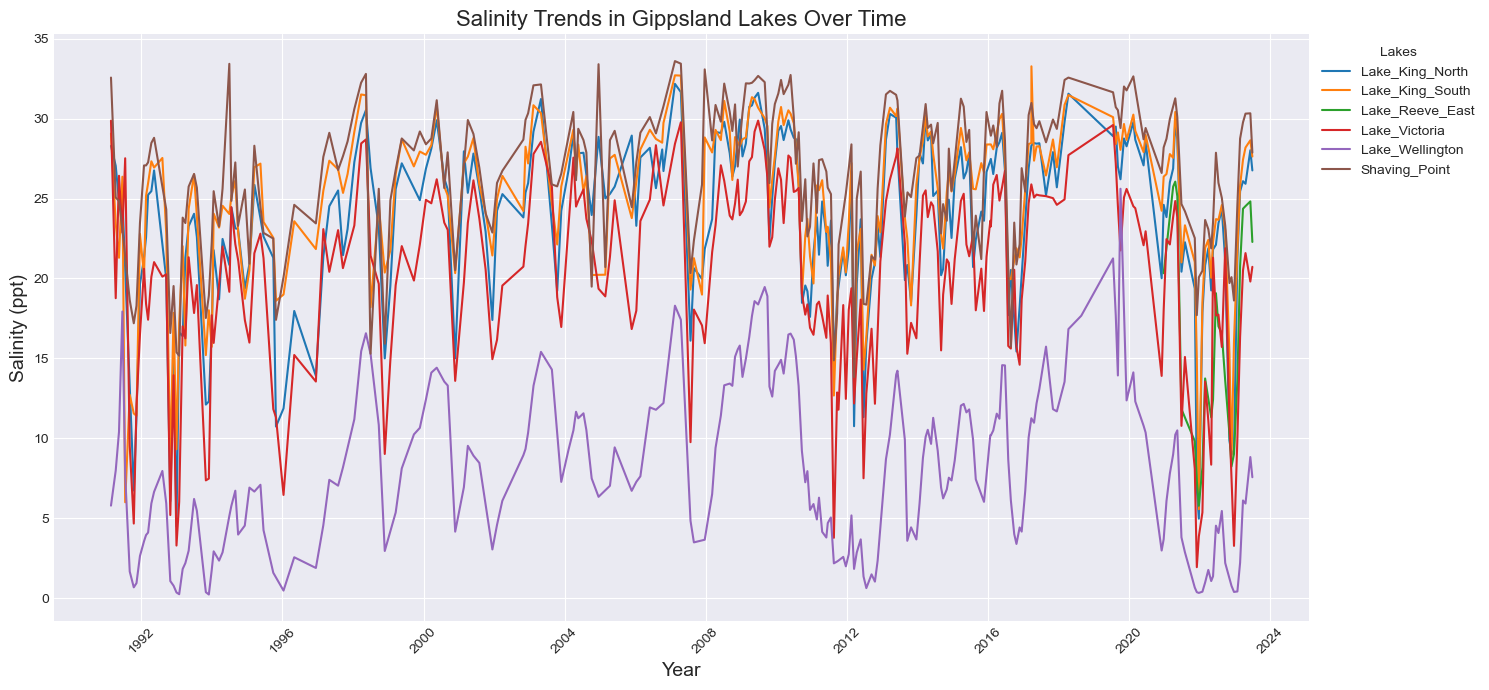

In [62]:
# Isolate the columns for salinity and dissolved oxygen along with 'date' and 'site_name_short'
water_quality_data = renamed_data[['sal', 'do_mg', 'date', 'site_name_short']]

# Drop rows where 'sal' or 'do_mg' are missing
water_quality_comparison_data = water_quality_data.dropna(subset=['sal', 'do_mg'])

# Group the data by 'site_name_short' and 'date' and calculate mean
water_quality_trends = water_quality_comparison_data.groupby(['site_name_short', 'date']).mean().reset_index()

# Set the aesthetic style of the plots
plt.style.use('seaborn-darkgrid')

# Create a figure and a set of subplots for salinity
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the salinity data for each lake
for lake in water_quality_trends['site_name_short'].unique():
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]
    ax.plot(lake_data['date'], lake_data['sal'], label=lake)

# Title and labels for salinity plot
ax.set_title('Salinity Trends in Gippsland Lakes Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Salinity (ppt)', fontsize=14)
ax.legend(title='Lakes', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



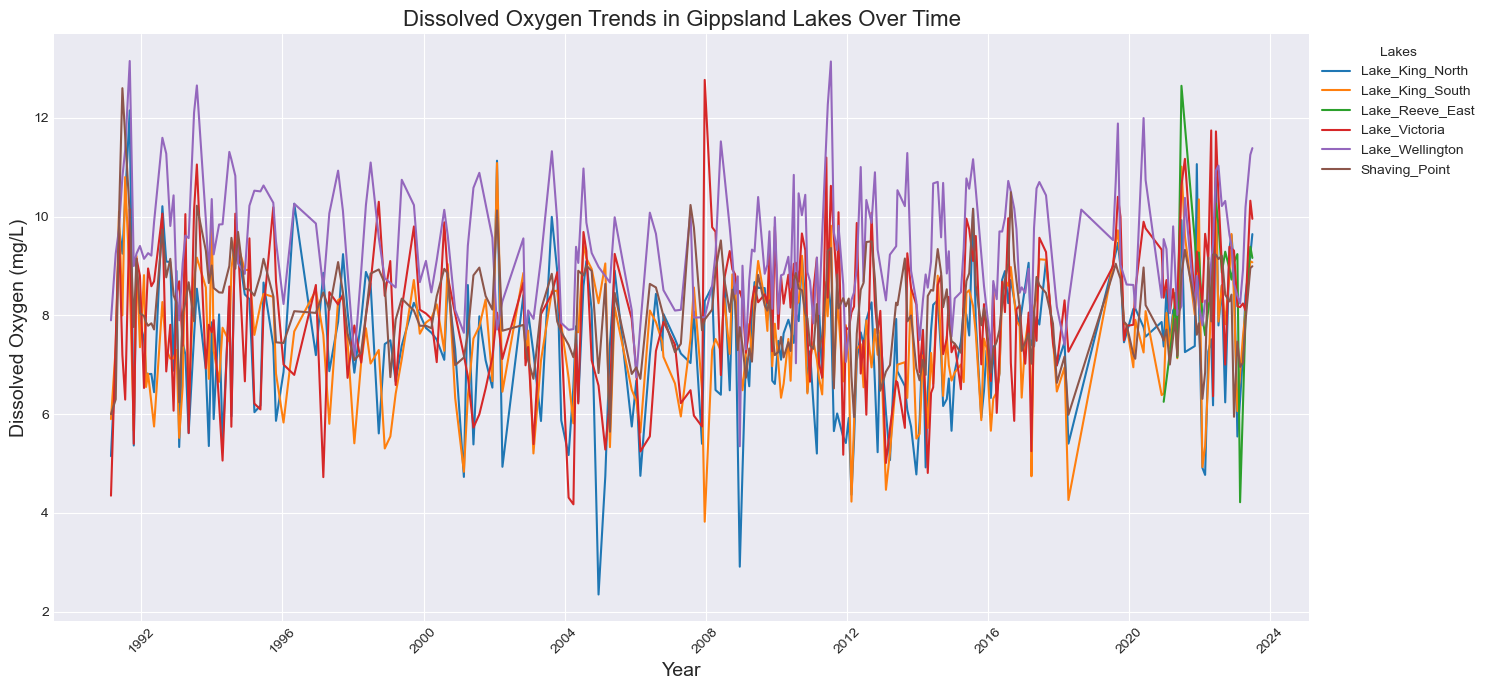

In [63]:
# Create a figure and a set of subplots for dissolved oxygen
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the dissolved oxygen data for each lake
for lake in water_quality_trends['site_name_short'].unique():
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]
    ax.plot(lake_data['date'], lake_data['do_mg'], label=lake)

# Title and labels for dissolved oxygen plot
ax.set_title('Dissolved Oxygen Trends in Gippsland Lakes Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Dissolved Oxygen (mg/L)', fontsize=14)
ax.legend(title='Lakes', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

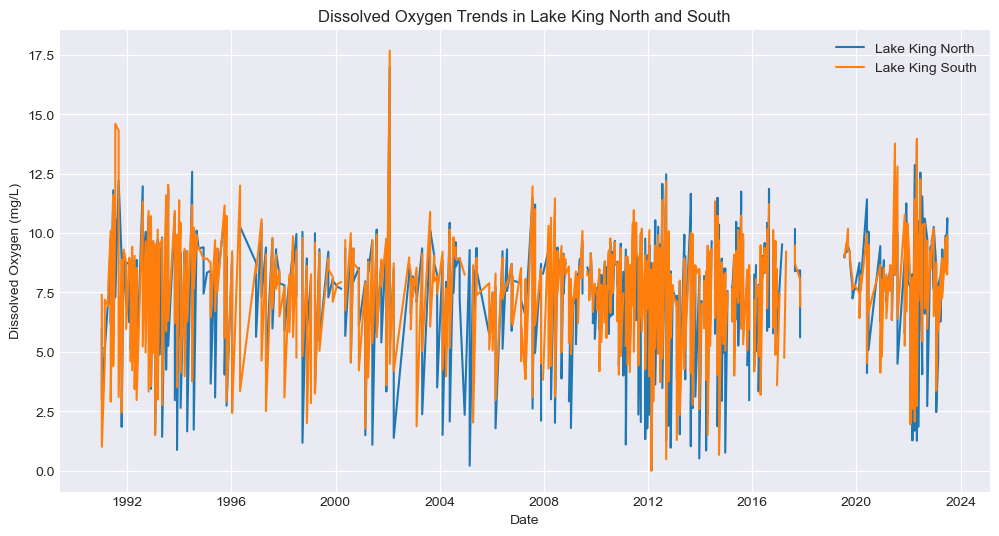

In [64]:
# Filtering data for Lake King North and South
plt.figure(figsize=(12, 6))
plt.plot(lake_k_n['date'], lake_k_n['do_mg'], label='Lake King North')
plt.plot(lake_k_s['date'], lake_k_s['do_mg'], label='Lake King South')
plt.title('Dissolved Oxygen Trends in Lake King North and South')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.legend()
plt.show()

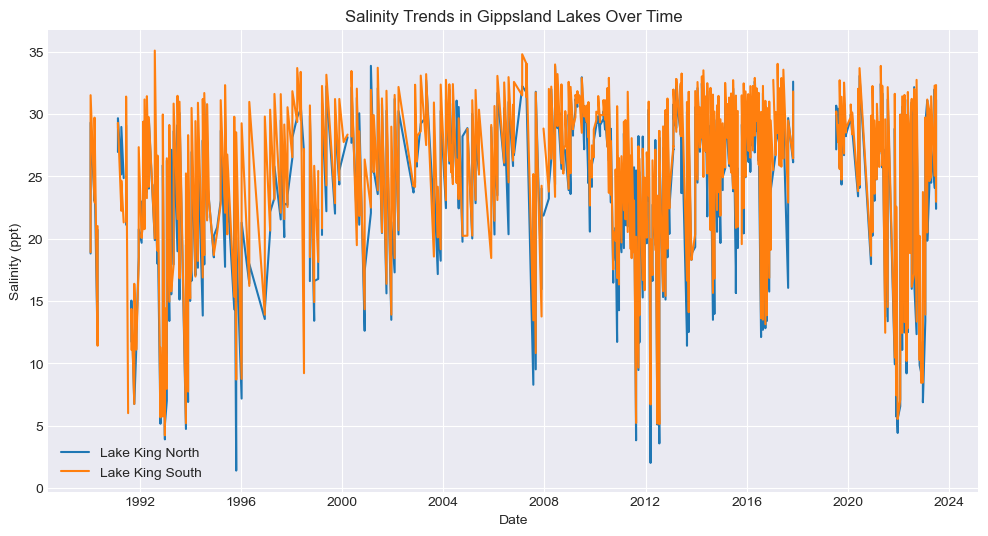

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(lake_k_n['date'], lake_k_n['sal'], label='Lake King North')
plt.plot(lake_k_s['date'], lake_k_s['sal'], label='Lake King South')
plt.title('Salinity Trends in Gippsland Lakes Over Time')
plt.xlabel('Date')
plt.ylabel('Salinity (ppt)')
plt.legend()
plt.show()

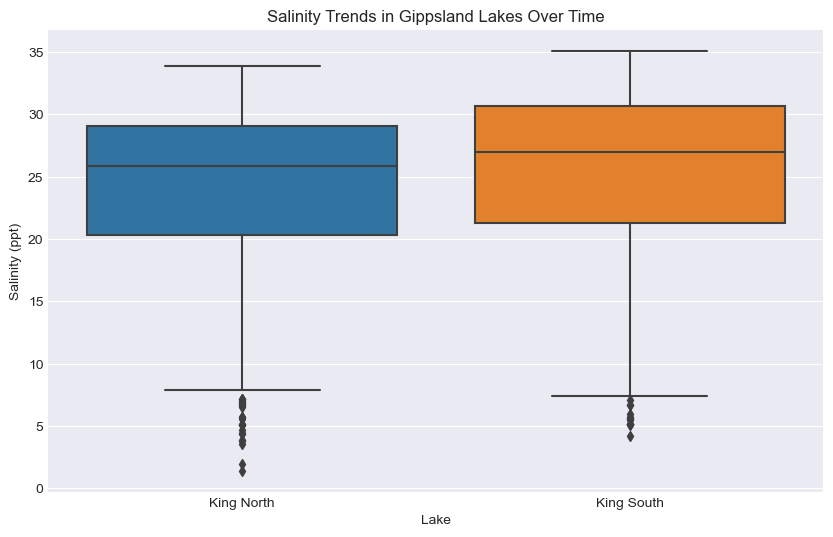

Statistics for Lake King North:
count    607.000000
mean      23.901254
std        6.763143
min        1.387500
25%       20.327700
50%       25.829300
75%       29.061950
max       33.862900
Name: sal, dtype: float64

Statistics for Lake King South:
count    621.000000
mean      25.294997
std        6.758062
min        4.219100
25%       21.295000
50%       26.992100
75%       30.679600
max       35.078000
Name: sal, dtype: float64


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine the data from both lakes into a single DataFrame for easier plotting
combined_data = pd.concat([
    lake_k_n[['date', 'sal']].assign(Lake='King North'),
    lake_k_s[['date', 'sal']].assign(Lake='King South')
])

# Box plot for visual comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lake', y='sal', data=combined_data)
plt.title('Salinity Trends in Gippsland Lakes Over Time')
plt.xlabel('Lake')
plt.ylabel('Salinity (ppt)')
plt.show()

# Calculating important statistics
stats_k_n = lake_k_n['sal'].describe()
stats_k_s = lake_k_s['sal'].describe()

print("Statistics for Lake King North:")
print(stats_k_n)
print("\nStatistics for Lake King South:")
print(stats_k_s)


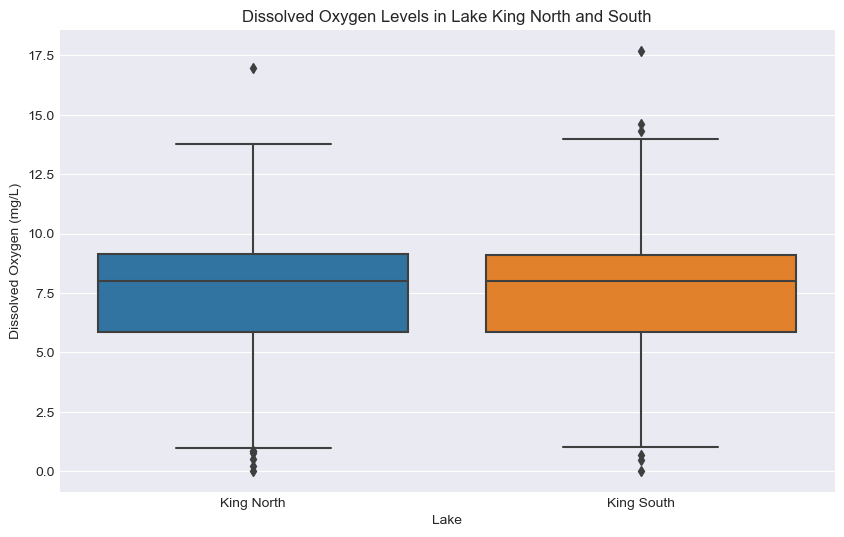

Statistics for Lake King North:
count    569.000000
mean       7.381819
std        2.688884
min        0.000000
25%        5.854300
50%        8.003500
75%        9.160000
max       16.967900
Name: do_mg, dtype: float64

Statistics for Lake King South:
count    577.000000
mean       7.461042
std        2.482570
min        0.000000
25%        5.857800
50%        8.000370
75%        9.110000
max       17.679300
Name: do_mg, dtype: float64


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine the data from both lakes into a single DataFrame for easier plotting
combined_data = pd.concat([
    lake_k_n[['date', 'do_mg']].assign(Lake='King North'),
    lake_k_s[['date', 'do_mg']].assign(Lake='King South')
])

# Box plot for visual comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lake', y='do_mg', data=combined_data)
plt.title('Dissolved Oxygen Levels in Lake King North and South')
plt.xlabel('Lake')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.show()

# Calculating important statistics
stats_k_n = lake_k_n['do_mg'].describe()
stats_k_s = lake_k_s['do_mg'].describe()

print("Statistics for Lake King North:")
print(stats_k_n)
print("\nStatistics for Lake King South:")
print(stats_k_s)


Dissolved Oxygen (DO):

Ecosystem Health: DO is crucial for the survival of most aquatic organisms. High levels of DO generally indicate a healthy water body with a good balance of aquatic life.
Photosynthesis and Respiration: High DO during daylight hours suggests abundant photosynthetic activity by algae and aquatic plants, while lower levels at night can indicate respiration by these organisms and other aerobic microbes.
Pollution and Eutrophication: Very high levels of nutrients can lead to eutrophication, where excessive plant growth (especially algae) depletes oxygen as these plants die and decompose, leading to low DO levels. This can cause dead zones, where life struggles to survive due to lack of oxygen.
Temperature Correlation: DO levels are also affected by temperature; cooler water can hold more oxygen than warmer water.
Salinity (ppt - parts per thousand):

Freshwater vs. Saltwater Influence: Salinity indicates the salt concentration in water. Lakes with higher salinity might be influenced by seawater intrusion, especially if they are located near the coast or connected to a saline water body.
Species Composition: The salinity level can greatly affect the types of species that live in the lake. Different species have varying tolerances to salinity, and significant changes can lead to shifts in the aquatic ecosystem.
Water Movement and Sources: Changes in salinity can also reflect patterns in water movement, sources of inflow (like freshwater rivers versus tidal inflows), and potentially climate-related factors like evaporation rates.
Indicator of Pollution: In some cases, elevated salinity can be an indicator of pollution, particularly from road runoff (which contains salts used for deicing) or from certain types of industrial discharges.
By monitoring both DO and salinity, you can get a comprehensive view of the water quality and ecological dynamics in Lake King North and South. For example, if DO levels are consistently low and salinity is high, it might suggest a reduced capacity for supporting diverse aquatic life, possibly due to factors like pollution or changes in water inflow patterns. Conversely, high DO and stable, suitable salinity levels typically indicate a healthier and more stable lake environment.

/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/1682727863.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_k_n['sal_smoothed'] = lake_k_n['sal'].rolling(window=window_size).mean()
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/1682727863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_k_s['sal_smoothed'] = lake_k_s['sal'].rolling(window=window_size).mean()
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/1682727863.py:14: SettingWithCopyW

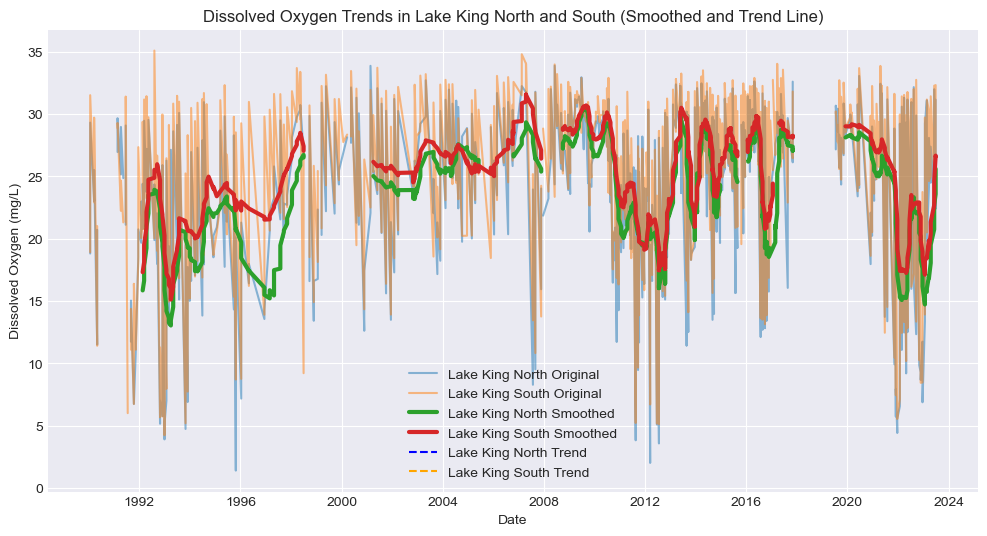

In [68]:
from scipy import stats


# Assuming 'lake_k_n' and 'lake_k_s' are your DataFrame variables
# with 'date' as a datetime column and 'sal' as dissolved oxygen levels

# Smoothing with a rolling mean
window_size = 12  # Adjust the window size as appropriate for your dataset
lake_k_n['sal_smoothed'] = lake_k_n['sal'].rolling(window=window_size).mean()
lake_k_s['sal_smoothed'] = lake_k_s['sal'].rolling(window=window_size).mean()

# Linear Regression
# First, we need a numeric "time" variable for regression
lake_k_n['time'] = range(len(lake_k_n))
slope_n, intercept_n, r_value, p_value, std_err = stats.linregress(lake_k_n['time'], lake_k_n['sal'])
lake_k_n['sal_trend'] = intercept_n + slope_n * lake_k_n['time']

lake_k_s['time'] = range(len(lake_k_s))
slope_s, intercept_s, r_value, p_value, std_err = stats.linregress(lake_k_s['time'], lake_k_s['sal'])
lake_k_s['sal_trend'] = intercept_s + slope_s * lake_k_s['time']

# Plotting
plt.figure(figsize=(12, 6))

# Original Data
plt.plot(lake_k_n['date'], lake_k_n['sal'], label='Lake King North Original', alpha=0.5)
plt.plot(lake_k_s['date'], lake_k_s['sal'], label='Lake King South Original', alpha=0.5)

# Smoothed Data
plt.plot(lake_k_n['date'], lake_k_n['sal_smoothed'], label='Lake King North Smoothed', linewidth=3)
plt.plot(lake_k_s['date'], lake_k_s['sal_smoothed'], label='Lake King South Smoothed', linewidth=3)

# Linear Regression Trend
plt.plot(lake_k_n['date'], lake_k_n['sal_trend'], label='Lake King North Trend', color='blue', linestyle='--')
plt.plot(lake_k_s['date'], lake_k_s['sal_trend'], label='Lake King South Trend', color='orange', linestyle='--')

plt.title('Dissolved Oxygen Trends in Lake King North and South (Smoothed and Trend Line)')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.legend()
plt.show()


/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/2625433593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/2625433593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/262

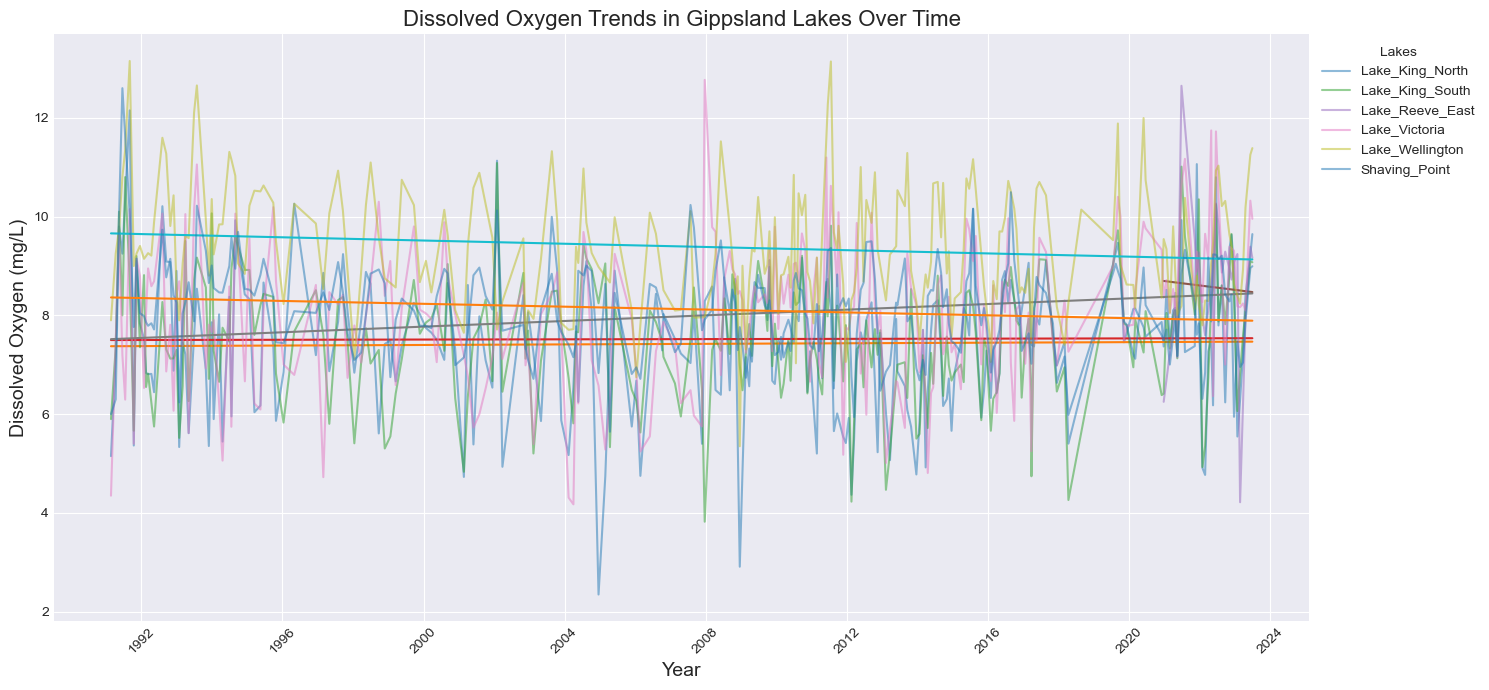

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming 'water_quality_trends' is your DataFrame and it's properly preprocessed

# Create a figure and a set of subplots for dissolved oxygen
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the dissolved oxygen data and the regression line for each lake
for lake in water_quality_trends['site_name_short'].unique():
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]
    
    # Convert dates to ordinal numbers for regression
    lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(lake_data['date_ordinal'], lake_data['do_mg'])
    
    # Plot the original DO data
    ax.plot(lake_data['date'], lake_data['do_mg'], label=lake, alpha=0.5)
    
    # Create the regression line
    reg_line = slope * lake_data['date_ordinal'] + intercept
    
    # Plot the regression line
    ax.plot(lake_data['date'], reg_line, label=f'{lake} Trend')

# Title and labels for dissolved oxygen plot
ax.set_title('Dissolved Oxygen Trends in Gippsland Lakes Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Dissolved Oxygen (mg/L)', fontsize=14)

# Customizing the legend to only show lake names (not trends)
handles, labels = ax.get_legend_handles_labels()
# Filter out labels that contain 'Trend' to avoid duplicate legend entries
handles = [h for h, l in zip(handles, labels) if 'Trend' not in l]
labels = [l for l in labels if 'Trend' not in l]
ax.legend(handles, labels, title='Lakes', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/4005536401.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/4005536401.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/400

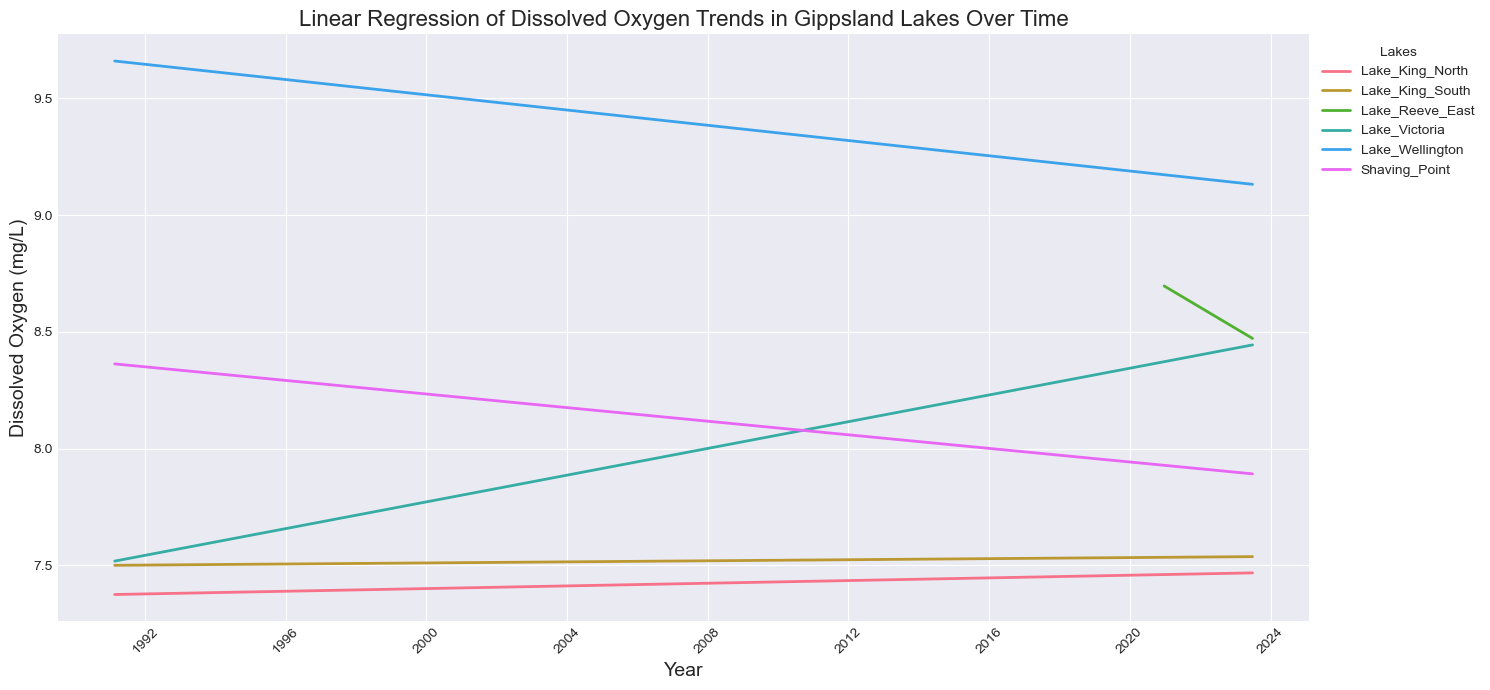

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import seaborn as sns  # For a nice palette of colors

# Assuming 'water_quality_trends' is your DataFrame and it's properly preprocessed
# Create a figure and a set of subplots for dissolved oxygen
fig, ax = plt.subplots(figsize=(15, 7))

# Define a color palette
palette = sns.color_palette('husl', n_colors=water_quality_trends['site_name_short'].nunique())

# Plot the regression line for dissolved oxygen data for each lake
for idx, (lake, color) in enumerate(zip(water_quality_trends['site_name_short'].unique(), palette)):
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]
    
    # Convert dates to ordinal numbers for regression
    lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(lake_data['date_ordinal'], lake_data['do_mg'])
    
    # Create the regression line
    reg_line = slope * lake_data['date_ordinal'] + intercept
    
    # Plot the regression line with a unique color and label
    ax.plot(lake_data['date'], reg_line, label=lake, color=color, linewidth=2)

# Title and labels for dissolved oxygen plot
ax.set_title('Linear Regression of Dissolved Oxygen Trends in Gippsland Lakes Over Time', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Dissolved Oxygen (mg/L)', fontsize=14)

# Legend
ax.legend(title='Lakes', loc='upper left', bbox_to_anchor=(1, 1))

# Formatting the date ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/104501271.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/104501271.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/10450

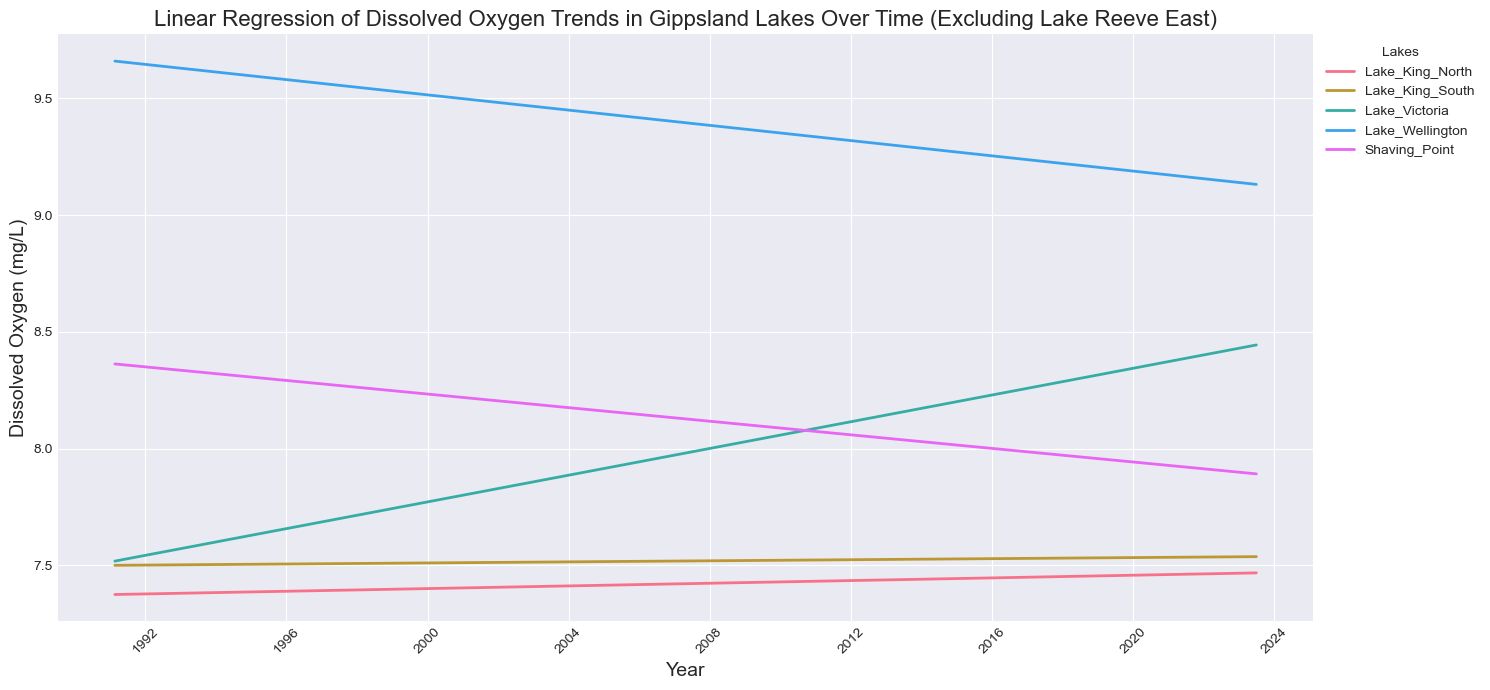

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import seaborn as sns  # For a nice palette of colors

# Assuming 'water_quality_trends' is your DataFrame and it's properly preprocessed
# Create a figure and a set of subplots for dissolved oxygen
fig, ax = plt.subplots(figsize=(15, 7))

# Define a color palette
palette = sns.color_palette('husl', n_colors=water_quality_trends['site_name_short'].nunique())

# Loop through the unique lakes, excluding 'Lake_Reeve_East'
for lake, color in zip(water_quality_trends['site_name_short'].unique(), palette):
    if lake == 'Lake_Reeve_East':
        continue  # Skip the rest of the loop for 'Lake_Reeve_East'
    
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]
    
    # Convert dates to ordinal numbers for regression
    lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(lake_data['date_ordinal'], lake_data['do_mg'])
    
    # Create the regression line
    reg_line = slope * lake_data['date_ordinal'] + intercept
    
    # Plot the regression line with a unique color and label
    ax.plot(lake_data['date'], reg_line, label=lake, color=color, linewidth=2)

# Title and labels for dissolved oxygen plot
ax.set_title('Linear Regression of Dissolved Oxygen Trends in Gippsland Lakes Over Time (Excluding Lake Reeve East)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Dissolved Oxygen (mg/L)', fontsize=14)

# Legend
ax.legend(title='Lakes', loc='upper left', bbox_to_anchor=(1, 1))

# Formatting the date ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/2367633225.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/2367633225.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
/var/folders/md/8hpdh77951s0hzlk9sc1mmlm0000gn/T/ipykernel_82139/236

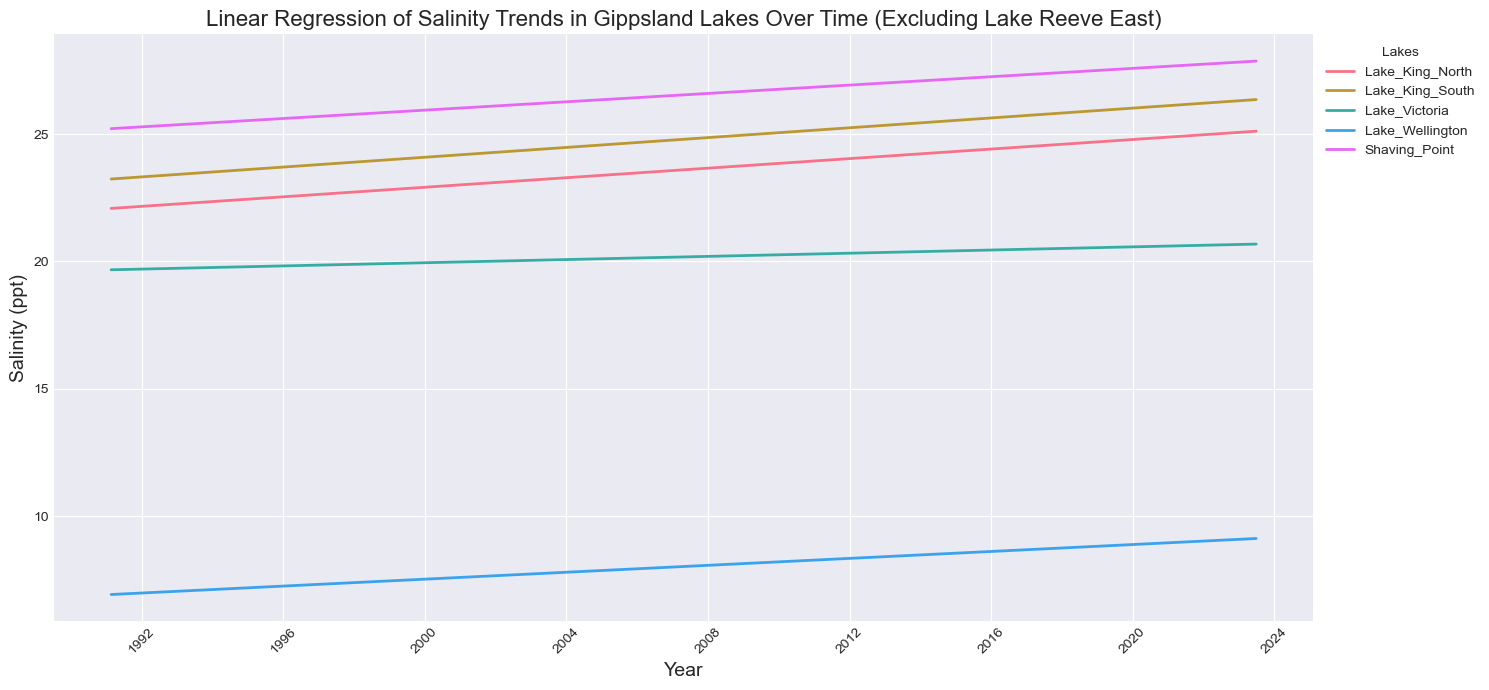

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import seaborn as sns  # For a nice palette of colors

# Assuming 'water_quality_trends' is your DataFrame and it's properly preprocessed
# Create a figure and a set of subplots for salinity
fig, ax = plt.subplots(figsize=(15, 7))

# Define a color palette
palette = sns.color_palette('husl', n_colors=water_quality_trends['site_name_short'].nunique())

# Loop through the unique lakes, excluding 'Lake_Reeve_East'
for lake, color in zip(water_quality_trends['site_name_short'].unique(), palette):
    if lake == 'Lake_Reeve_East':
        continue  # Skip the rest of the loop for 'Lake_Reeve_East'
    
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]
    
    # Convert dates to ordinal numbers for regression
    lake_data['date_ordinal'] = pd.to_datetime(lake_data['date']).apply(lambda x: x.toordinal())
    
    # Calculate the linear regression for salinity
    slope, intercept, r_value, p_value, std_err = linregress(lake_data['date_ordinal'], lake_data['sal'])
    
    # Create the regression line for salinity
    reg_line = slope * lake_data['date_ordinal'] + intercept
    
    # Plot the regression line for salinity with a unique color and label
    ax.plot(lake_data['date'], reg_line, label=lake, color=color, linewidth=2)

# Title and labels for salinity plot
ax.set_title('Linear Regression of Salinity Trends in Gippsland Lakes Over Time (Excluding Lake Reeve East)', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Salinity (ppt)', fontsize=14)

# Legend
ax.legend(title='Lakes', loc='upper left', bbox_to_anchor=(1, 1))

# Formatting the date ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Causes of Rising Salinity:
Reduced Freshwater Inflow: Reduced inflow from rivers and streams, possibly due to drought, upstream water extraction, or changes in land use, can decrease the dilution of saline water.
Sea Water Intrusion: If the lakes are connected to the sea, higher sea levels or storm surges can push saltwater into the lakes.
Evaporation: High temperatures and evaporation rates can concentrate salt in the water.
Agricultural Runoff: Salts can also be introduced through runoff from agricultural areas, where fertilizers and other chemicals contain soluble salts.
Consequences of Rising Salinity:
Ecosystem Changes: Elevated salinity levels can alter the ecological balance, affecting plant and animal species that are not tolerant to higher salinity.
Water Quality Degradation: Salinity can impact water quality, affecting its suitability for drinking, irrigation, and industrial uses.
Biodiversity Loss: Sensitive species may be lost, and the overall biodiversity of the lake system can decline.
Altered Fish Populations: Fish species that cannot tolerate higher salinity may decrease in number, while those that can may increase.
Impacts on Agriculture: Higher salinity can affect agriculture around the lakes, particularly if the water is used for irrigation.
Understanding the specific context of the Gippsland Lakes, including its hydrology, connection to the sea, and local land use practices, is crucial for a more detailed analysis. If you have specific data or details about the Gippsland Lakes, I can provide more tailored insights.

In [73]:
import pandas as pd
from scipy.stats import linregress

# Assuming 'water_quality_trends' is your DataFrame with the relevant data
# Ensure 'date' is in datetime format and 'sal' contains salinity measurements

# First, ensure the 'date' column is in datetime format
water_quality_trends['date'] = pd.to_datetime(water_quality_trends['date'])

# Prepare a dictionary to store the percentage increase for each lake
percentage_increase = {}

# Loop through each unique lake in your dataset
for lake in water_quality_trends['site_name_short'].unique():
    # Skip 'Lake_Reeve_East' if it's in the dataset
    if lake == 'Lake_Reeve_East':
        continue

    # Filter the data for the current lake
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]

    # Sort the data by date to ensure correct calculation
    lake_data = lake_data.sort_values(by='date')

    # Filter out data to keep only the last 10 years
    ten_years_ago = lake_data['date'].max() - pd.DateOffset(years=30)
    lake_data = lake_data[lake_data['date'] >= ten_years_ago]

    # Check if there is enough data to calculate the percentage increase
    if len(lake_data) > 1:
        # Calculate the initial and final salinity values
        initial_salinity = lake_data.iloc[0]['sal']
        final_salinity = lake_data.iloc[-1]['sal']

        # Calculate the percentage increase
        increase = (final_salinity - initial_salinity) / initial_salinity * 100
        percentage_increase[lake] = increase

# Print or return the percentage increases
print(percentage_increase)


{'Lake_King_North': 11.276378984136242, 'Lake_King_South': 4.234947940244462, 'Lake_Victoria': 16.20882971268397, 'Lake_Wellington': 21.954444668413633, 'Shaving_Point': 5.023077937491744}


In [74]:
import pandas as pd
from scipy.stats import linregress

# First, ensure the 'date' column is in datetime format
water_quality_trends['date'] = pd.to_datetime(water_quality_trends['date'])

# Prepare a dictionary to store the percentage increase for each lake
percentage_increase = {}

# Loop through each unique lake in your dataset
for lake in water_quality_trends['site_name_short'].unique():
    # Skip 'Lake_Reeve_East' if it's in the dataset
    if lake == 'Lake_Reeve_East':
        continue

    # Filter the data for the current lake
    lake_data = water_quality_trends[water_quality_trends['site_name_short'] == lake]

    # Sort the data by date to ensure correct calculation
    lake_data = lake_data.sort_values(by='date')

    # Filter out data to keep only the last 10 years
    ten_years_ago = lake_data['date'].max() - pd.DateOffset(years=30)
    lake_data = lake_data[lake_data['date'] >= ten_years_ago]

    # Check if there is enough data to calculate the percentage increase
    if len(lake_data) > 1:
        # Calculate the initial and final salinity values
        initial_salinity = lake_data.iloc[0]['do_mg']
        final_salinity = lake_data.iloc[-1]['do_mg']

        # Calculate the percentage increase
        increase = (final_salinity - initial_salinity) / initial_salinity * 100
        percentage_increase[lake] = increase

# Print or return the percentage increases
print(percentage_increase)

{'Lake_King_North': 27.249340369393117, 'Lake_King_South': 4.011461318051572, 'Lake_Victoria': -1.780957079427729, 'Lake_Wellington': -5.939694341181339, 'Shaving_Point': 14.149746192893414}


array(['Shaving_Point'], dtype=object)